In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.style.use('ggplot')

In [3]:
car=pd.read_csv('car_data.csv')

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  816 non-null    int64 
 1   name        816 non-null    object
 2   company     816 non-null    object
 3   year        816 non-null    int64 
 4   Price       816 non-null    int64 
 5   kms_driven  816 non-null    int64 
 6   fuel_type   816 non-null    object
dtypes: int64(4), object(3)
memory usage: 44.8+ KB


In [5]:
car.describe(include='all')

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
count,816.000000,816,816,816.000000,8.160000e+02,816.000000,816
unique,NaN,254,25,NaN,NaN,NaN,3
top,NaN,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,NaN,51,221,NaN,NaN,NaN,428
mean,407.500000,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,235.703203,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,0.000000,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,203.750000,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,407.500000,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,611.250000,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [6]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [8]:
import seaborn as sns

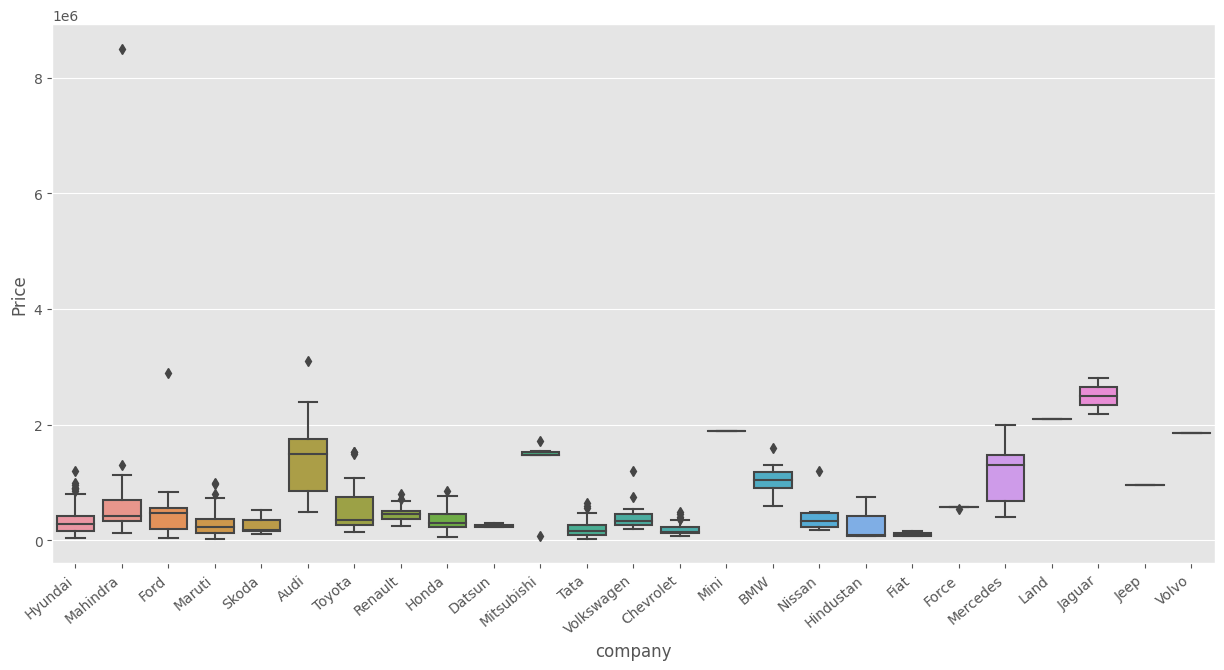

In [9]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# Extracting training data

In [10]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [11]:
y.shape

(816,)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [15]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [16]:
column_trans=make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
remainder='passthrough')

In [17]:
lr=LinearRegression()

In [18]:
pipe=make_pipeline(column_trans,lr)

In [19]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [20]:
y_pred=pipe.predict(X_test)

In [21]:
r2_score(y_test,y_pred)

0.6243025413592003

In [22]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [23]:
np.argmax(scores)

247

In [24]:
scores[np.argmax(scores)]

0.8604602644312209

In [25]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([453164.82282671])

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8604602644312209

In [27]:
import pickle

In [28]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))
    

array([455413.55294819])